In [4]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# zad 1

r_0 = 5
r_1 = 15
sigma_0 = 4
sigma_1 = 6

# funkcja potencjału
def V(r):
    return (-(1.0 / (sigma_0 * np.sqrt(2 * np.pi))) * np.exp(-(r - r_0)**2 / (2 * sigma_0**2)) \
            -(1.0 / (sigma_1 * np.sqrt(2 * np.pi))) * np.exp(-(r - r_1)**2 / (2 * sigma_1**2)))

s = 0.2 # [Å] długość kroku
t = 10**5 # ilość kroków czasu
k = 0.002 # [kcal / (mol * K)] stała Boltzmanna

# prawdopodobieństwo akceptacji kroku z r_1 do r_2 z wyższym potencjałem
def p(r_1, r_2, T):
    try:
        dr = np.abs(r_1 - r_2)
        beta = 1 / (k * T)
        return np.exp(-beta * dr)
    except ZeroDivisionError:
        return 0

# metoda monte carlo
def monte_carlo(initial_r, initial_T = 300, cooling = 1):
    r_result = []
    V_result = []
    p_result = []
    r = initial_r
    T = initial_T
    for _ in range(t):
        _r = r + np.random.uniform(-s, s)
        r_result.append(r)
        V_result.append(V(r))
        if V(_r) < V(r):
            p_result.append(1)
        else:
            p_result.append(p(r, _r, T))
        if V(_r) < V(r) or p(r, _r, T) > np.random.uniform(0, 1):
            r = _r        
        T *= cooling
        
    return r_result, V_result, p_result

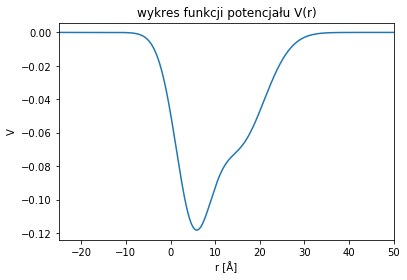

In [5]:
r = np.linspace(-25, 50, 10000)
plt.plot(r, V(r))
plt.xlim(-25, 50)
plt.xlabel('r [Å]')
plt.ylabel('V')
plt.title('wykres funkcji potencjału V(r)')

średnie p wynosi 0.917381819933


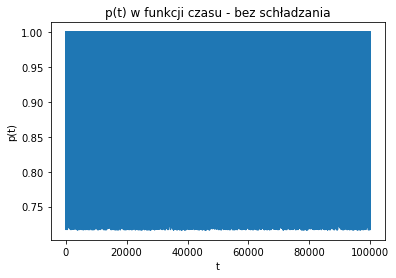

In [6]:
# zad 2
# bez schładzania, dla temperatury 300K

_, _, ps = monte_carlo(initial_r = 0)

plt.plot(range(t), ps)
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('p(t) w funkcji czasu - bez schładzania')

p_mean = np.mean(ps)
print('średnie p wynosi ' + str(p_mean))

In [7]:
# zad 3
# bez schładzania, dla temperatury 300K

plt.hist(rs, 10, normed = 1)
plt.xlabel('r [Å]')
plt.ylabel('p(r)')
plt.title('histogram występowania układu w punkcie r')

NameError: name 'rs' is not defined

minimum (ostatnia obliczona wartość) V(r) wynosi -0.118295279271


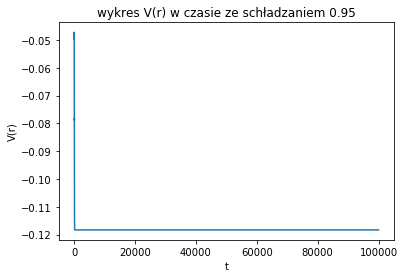

In [20]:
# zad 4
# schładzanie 0.95

_, Vs, _ = monte_carlo(initial_r = 0, cooling = 0.95)

plt.plot(range(t), Vs)
plt.xlabel('t')
plt.ylabel('V(r)')
plt.title('wykres V(r) w czasie ze schładzaniem 0.95')

print('minimum (ostatnia obliczona wartość) V(r) wynosi ' + str(Vs[-1]))

Poprawnie zaklasyfikowano 62.06666666666667% danych


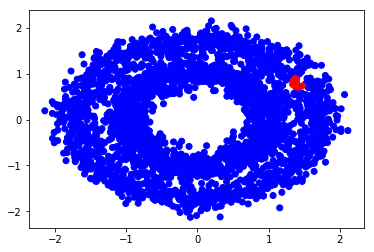

In [9]:
# zad 5

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

n = datasets.make_circles(n_samples = 3000, factor = 0.6, noise = 0.1)
x, y = n

x = StandardScaler().fit_transform(x)

m = cluster.DBSCAN(eps = 0.07)
m.fit(x)

colorArrayM = ['b' if i else 'r' for i in m.labels_]

good = [i for i in range(3000) if list(y)[i] != list(m.labels_)[i]]

print('Poprawnie zaklasyfikowano ' + str((len(good) / 3000.0) * 100) + '% danych')

plt.scatter(x[:,0], x[:,1], c = colorArrayM)